In [30]:
from preparing_script import data_processing_agrochem
import pandas as pd 
import numpy as np 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


подготовка данных из того что уже предобработанно

In [31]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная.csv', sep = ';') #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Органический углерод, %']

# общий датафрейм
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20"])][agrochem_columns] #можно будет добавить глубины 20-30
agrochemistry_main['GPS №'] = agrochemistry_main['GPS №'].astype(int)
agrochemistry_main.drop('повторность', axis = 1, inplace= True)
agrochemistry_main.dropna(axis = 0, inplace= True)

# разбивка по точкам на ПП
pp_points = [525,526,527,528,586]
by_points = agrochemistry_main[agrochemistry_main["GPS №"].isin(pp_points)]

## pH солевой вытяжки

### По обработкам

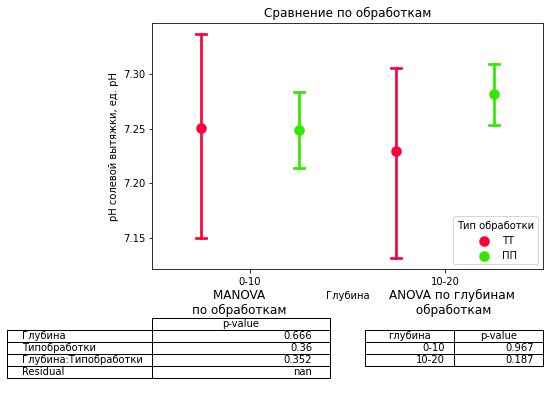

рН солевой вытяжки, ед. рН                    
                                            mean       std variation
Тип обработки Глубина                                               
ПП            0-10                      7.248788  0.105320  0.014307
              10-20                     7.281818  0.085858  0.011611
ТТ            0-10                      7.250556  0.200806  0.026915
              10-20                     7.229524  0.198380  0.026779

In [32]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН солевой вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

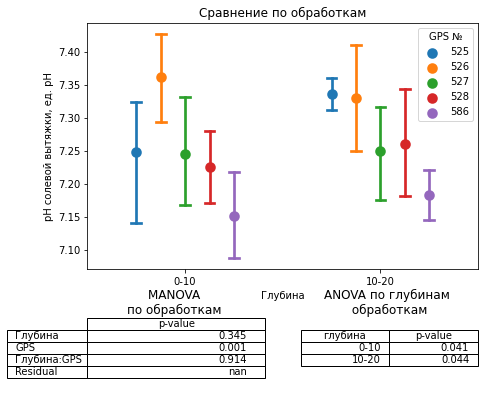

рН солевой вытяжки, ед. рН                    
                                    mean       std variation
GPS № Глубина                                               
525   0-10                         7.248  0.121943  0.015048
      10-20                        7.336  0.032863  0.004007
526   0-10                         7.362  0.085849  0.010430
      10-20                        7.330  0.103199  0.012593
527   0-10                         7.246  0.109453  0.013511
      10-20                        7.250  0.088600  0.010931
528   0-10                         7.226  0.069857  0.008647
      10-20                        7.260  0.105830  0.013038
586   0-10                         7.152  0.085264  0.010663
      10-20                        7.184  0.048270  0.006010

In [33]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'рН солевой вытяжки, ед. рН', to_lable = "обработкам", by_points= 1)
stats

## pH водной вытяжки
### По обработкам

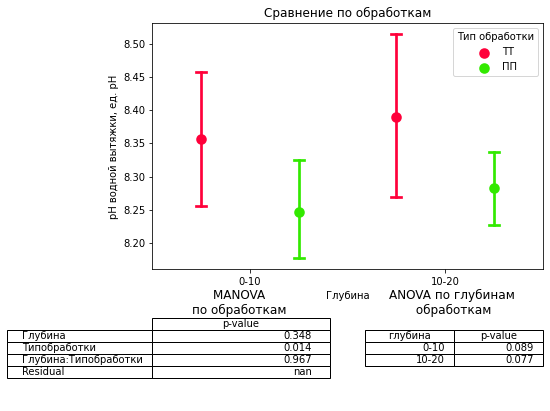

рН водной вытяжки, ед. рН                    
                                           mean       std variation
Тип обработки Глубина                                              
ПП            0-10                     8.245758  0.214360  0.025599
              10-20                    8.282727  0.160649  0.019099
ТТ            0-10                     8.356111  0.221894  0.025807
              10-20                    8.389524  0.275708  0.032071

In [34]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

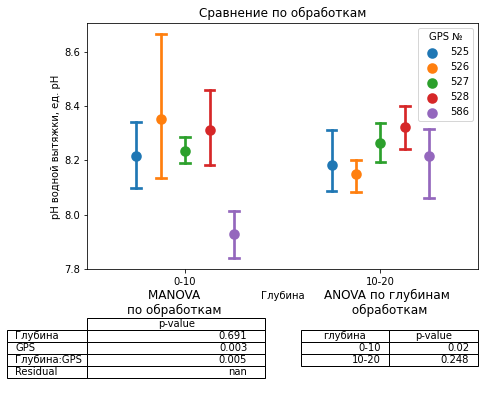

рН водной вытяжки, ед. рН                    
                                   mean       std variation
GPS № Глубина                                              
525   0-10                        8.216  0.150100  0.016340
      10-20                       8.184  0.146048  0.015962
526   0-10                        8.354  0.342681  0.036689
      10-20                       8.150  0.073824  0.008102
527   0-10                        8.236  0.061074  0.006633
      10-20                       8.266  0.095551  0.010339
528   0-10                        8.312  0.170206  0.018315
      10-20                       8.322  0.108490  0.011660
586   0-10                        7.928  0.114324  0.012898
      10-20                       8.216  0.175014  0.019053

In [35]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 1)
stats

## Фосфор (подвижная форма), мг/кг
### По обработкам

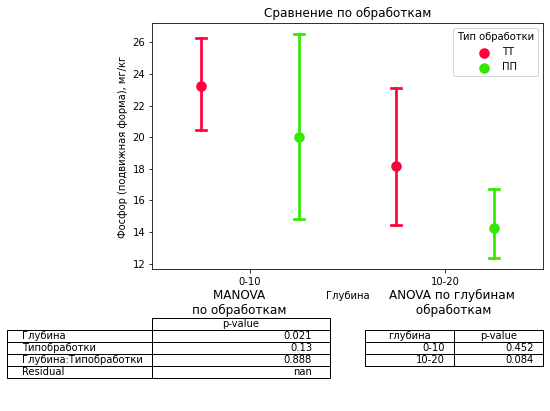

Фосфор (подвижная форма), мг/кг                     
                                                 mean        std variation
Тип обработки Глубина                                                     
ПП            0-10                          19.982789  17.464783  0.860647
              10-20                         14.267293   6.160291  0.425185
ТТ            0-10                          23.233092   6.487447  0.271366
              10-20                         18.185711  10.227940  0.548862

In [36]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

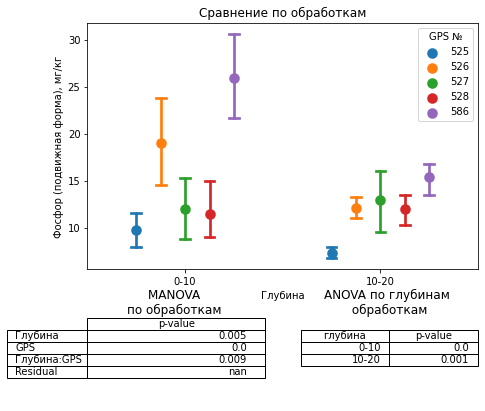

Фосфор (подвижная форма), мг/кг                    
                                         mean       std variation
GPS № Глубина                                                    
525   0-10                           9.706613  2.303828  0.212289
      10-20                          7.307061  0.778886  0.095340
526   0-10                          19.031199  6.127017  0.287957
      10-20                         12.134647  1.410623  0.103975
527   0-10                          11.937603  3.980710  0.298255
      10-20                         12.922824  4.260443  0.294878
528   0-10                          11.444992  3.809382  0.297704
      10-20                         11.937603  2.219484  0.166295
586   0-10                          26.040000  6.055411  0.207992
      10-20                         15.360000  2.031748  0.118311

In [37]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 1)
stats

## Калий (подвижная форма), млн-1
### По обработкам

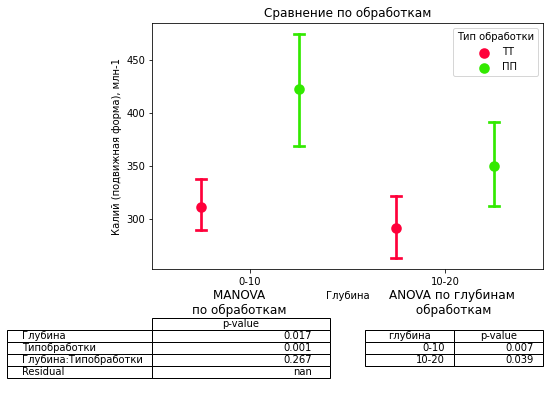

Калий (подвижная форма), млн-1                      
                                                mean         std variation
Тип обработки Глубина                                                     
ПП            0-10                        422.846028  164.735828  0.383640
              10-20                       349.779999  112.135714  0.315694
ТТ            0-10                        311.092648   52.871964  0.165167
              10-20                       291.527019   71.178987  0.238275

In [38]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

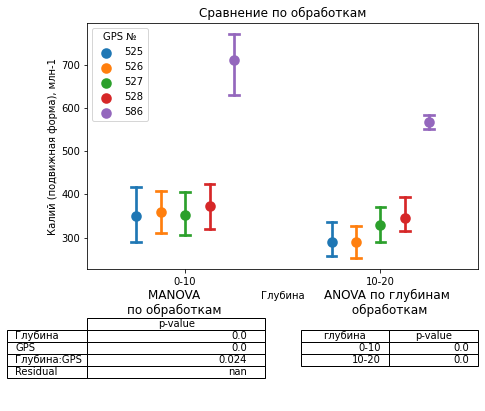

Калий (подвижная форма), млн-1                     
                                        mean        std variation
GPS № Глубина                                                    
525   0-10                        350.036512  80.827160  0.206533
      10-20                       289.850960  51.354438  0.158470
526   0-10                        357.925120  61.593437  0.153917
      10-20                       288.907024  47.559294  0.147239
527   0-10                        351.741376  61.972610  0.157587
      10-20                       329.703360  53.087453  0.144017
528   0-10                        372.729504  69.358274  0.166437
      10-20                       345.316832  54.259731  0.140542
586   0-10                        710.863272  90.900777  0.114374
      10-20                       566.787816  21.829745  0.034449

In [39]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 1)
stats

## Общий азот, %
### По обработкам

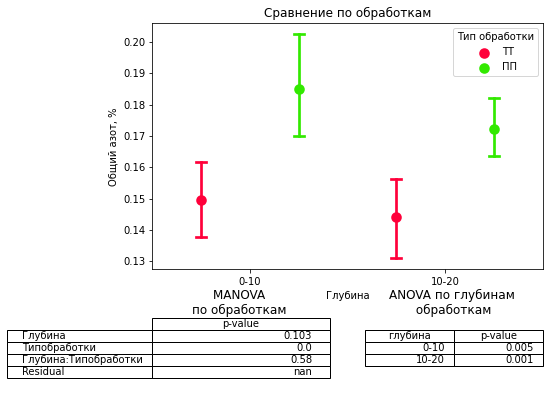

Общий азот, %                    
                               mean       std variation
Тип обработки Глубина                                  
ПП            0-10         0.185152  0.047901  0.254762
              10-20        0.172121  0.025588  0.146392
ТТ            0-10         0.149444  0.026451  0.172011
              10-20        0.144286  0.029928  0.202426

In [40]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

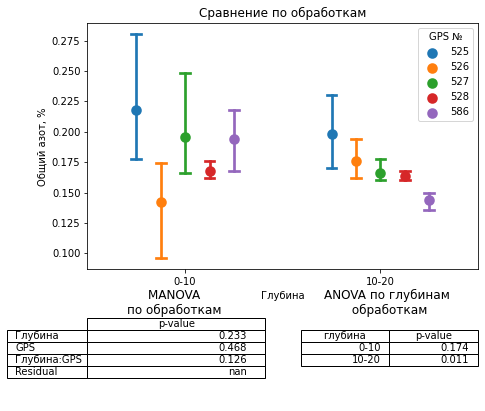

Общий азот, %                    
                       mean       std variation
GPS № Глубина                                  
525   0-10            0.218  0.069785  0.286321
      10-20           0.198  0.038987  0.176117
526   0-10            0.142  0.053572  0.337441
      10-20           0.176  0.020736  0.105382
527   0-10            0.196  0.058566  0.267261
      10-20           0.166  0.013416  0.072289
528   0-10            0.168  0.008367  0.044544
      10-20           0.164  0.005477  0.029872
586   0-10            0.194  0.028810  0.132826
      10-20           0.144  0.008944  0.055556

In [41]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 1)
stats

## Органический углерод, %
### По обработкам

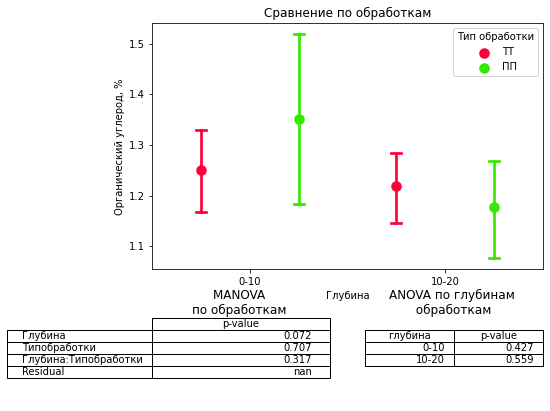

Органический углерод, %                    
                                         mean       std variation
Тип обработки Глубина                                            
ПП            0-10                   1.350852  0.506985  0.369577
              10-20                  1.178302  0.284810  0.238022
ТТ            0-10                   1.251465  0.179945  0.139736
              10-20                  1.218601  0.165052  0.132179

In [42]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 0)
stats

### По формам рельефа

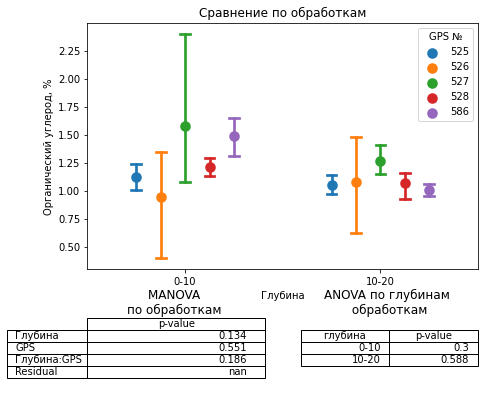

Органический углерод, %                    
                                 mean       std variation
GPS № Глубина                                            
525   0-10                   1.127491  0.156500  0.124150
      10-20                  1.050340  0.106397  0.090603
526   0-10                   0.942920  0.628614  0.596285
      10-20                  1.076960  0.530678  0.440734
527   0-10                   1.578800  0.905368  0.512912
      10-20                  1.263960  0.162072  0.114688
528   0-10                   1.213600  0.100986  0.074427
      10-20                  1.066940  0.150471  0.126142
586   0-10                   1.489880  0.242671  0.145684
      10-20                  1.003760  0.068942  0.061433

In [43]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 1)
stats